<a href="https://colab.research.google.com/github/Aramaan/Pytorch/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Data (preparing and loading)

Machine learning is a game of two parts


1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [ ]:
#create known parameters
weight = 0.7;
bias = 0.3;

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

 ## Splitting data into training and test sets


1.  Training Set
2.  Validation set
3.  test sets



In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
#scikitlearn test split introduces more randomeness to the split


In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c = "b",s = 4,label = "Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions, c ="r", label = "predictions")

  plt.legend(prop = {"size":14})




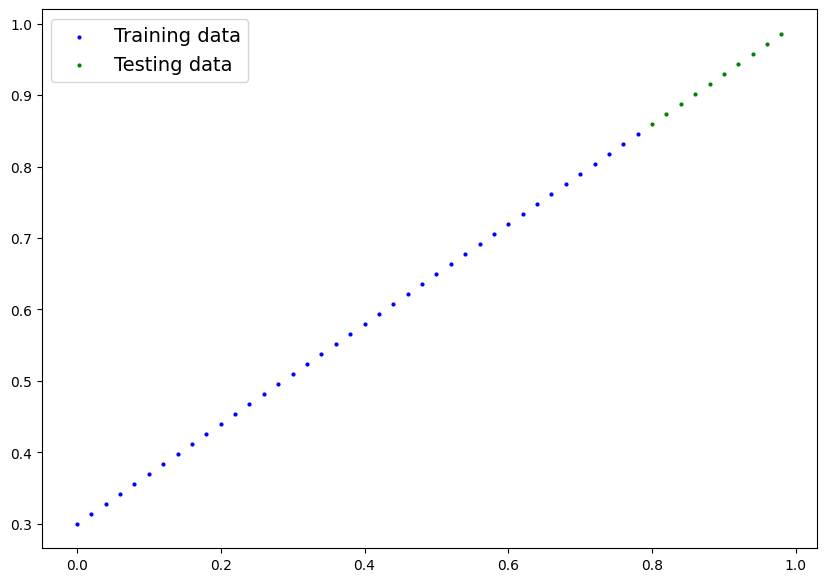

In [ ]:
plot_predictions()

#Build Model

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): #Almost everything in Pytorch uses nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))#requires_grad = True
    self.bias = nn.Parameter(torch.randn(1,))#dtype = torch.float
  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "X"
    return self.weights * x + self.bias #this is the linear regression formula




##Checking the contents of pytorch model


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

#Check out the parameters
model_0.state_dict()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

 check our model's predictive power,
lets see how well it predicts y_test based on X_test.

When we pass data through our model,
 it's going to run it through through the forward model

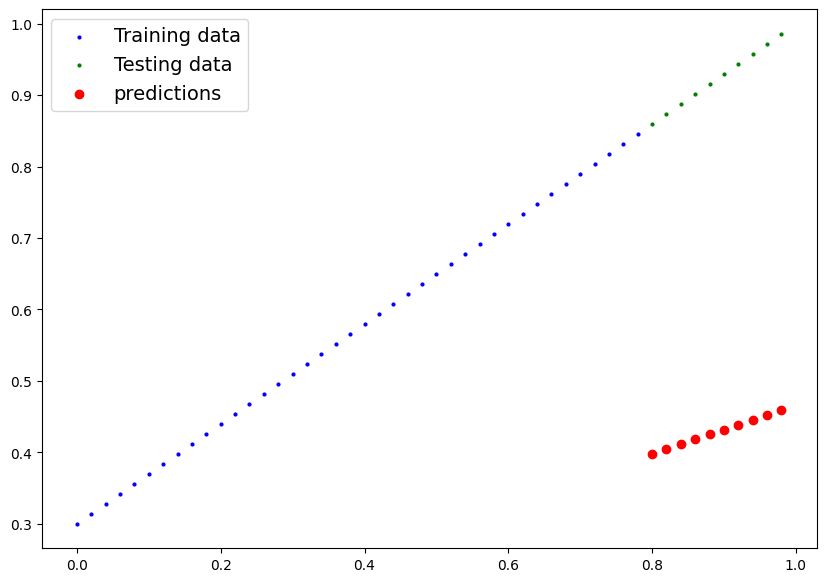

In [ ]:
#make predictions with model():
with torch.inference_mode(): #context manager
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

# Train model
The whole idea of training is to move from poor representation pf the data to better representation of the data.
One way to measure how poor or wrong your models predictions are is to use a 'loss function/cost function/criterion'



In [ ]:
 # Setup a loss function
 loss_fn = nn.L1Loss()

 # setup a optimizer
 optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.01)

##Building a training loop (and a testing loop) in PyTorch
 A couple of things we need in a training loop:


*  Loop through the data
*  Forward pass (this involves data moving through our model's 'forward() functions') to mae predictions on the data - functions - also called forward propagation
*  Calculate the loss (compare forward pass predictions to ground truth labels)
*  Optimizer zerograd
*   Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
*   Optimizer step - use the optimizer to adjust our model's parameters to try and improv the loss (**gradient descent**)








In [ ]:
#An epoch is one loop through the data
epochs = 1

###training
# 0. Lopp through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parametes
  # that require gradients to require gradients

  # Forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_preds,y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  #Bacpropagation on the loss with respect to parameter values
  loss.backward()

  # step the optimizer (perform gradient descent)
  optimizer.step()# by default how the optimizer changes will accumulate through
  # the loop s0 we have to zero them above in step 3 for the next iteration


 # model_0.eval() #turns off gradient tracking




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


RuntimeError: ignored